#1 Getting started with Jobs Analysis


* Total Job Roles
*Most demandable job role Powerbi | Tableau
*Top 25 Most Popular Job roles on Naukri
*Number of jobs by Experience Level
*Top 10 Job Roles
*Top 10 Job Locations
* Rating vs. Reviews






##1.1) Loading the Dataset

In [39]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')


!git clone https://github.com/AshishJangra27/datasets

df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')
df



fatal: destination path 'datasets' already exists and is not an empty directory.


,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
79142,6.012301e+10,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,...",2 Days Ago,https://www.naukri.com/job-listings-net-fullst...,https://www.naukri.com/citiustech-jobs-careers...
79143,1.122201e+10,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil...",1 Day Ago,https://www.naukri.com/job-listings-senior-bi-...,https://www.naukri.com/hexaware-technologies-j...
79144,1.512220e+11,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax",2 Days Ago,https://www.naukri.com/job-listings-powerbi-de...,https://www.naukri.com/ey-jobs-careers-9156
79145,2.712220e+11,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service...",10 Days Ago,https://www.naukri.com/job-listings-customer-s...,https://www.naukri.com/tech-mahindra-jobs-care...


## Check the null value

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


In [41]:
df.isnull().sum()

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
posted_on,480


##1.2) Handling Null Data


In [42]:
print('Earleir : ', len(df))

df.dropna(subset = 'job_id',inplace = True)
df['experience'].fillna('5-10 Yrs', inplace = True)
df['location'].fillna('Bangalore/Bengaluru', inplace = True)
df.dropna(subset = ['resposibilities','company'],inplace = True)

print('After : ', len(df))


Earleir :  79147
After :  78646


In [43]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,35718
reviews,35718
resposibilities,0
posted_on,0


##1.3) Handling Duplicate Values

In [44]:
print(len(df) - df['job_id'].nunique())

df.drop_duplicates(subset = 'job_id', inplace = True)

print(len(df) - df['job_id'].nunique())


5658
0


#2. Data Exploration & Cleaning

##2.1) Cleaning job_id

In [45]:
df['job_id'] = df['job_id'].astype('int').astype('object')
df['job_id']

,job_id
0,70123006070
1,60123905908
2,60123905898
3,60123905897
4,60123008332
...,...
73762,20123002989
73763,20123002957
73764,231222003986
73765,171220001449


##2.2) Cleaning experience

In [46]:
df['min_experience'] = df['experience'].str.replace(' Yrs','').str.split('-').str[0].astype('int')
df['max_experience'] = df['experience'].str.replace(' Yrs','').str.split('-').str[-1].astype('int')
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link,min_experience,max_experience
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213,1,6
1,60123905908,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...,11,15
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,3,7
3,60123905897,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,3,7
4,60123008332,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73762,20123002989,Partner Success Executive/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Jalandhar, Chandigarh, Amritsar",NaN,NaN,"CRM,Communication Skills,Presentation Skills,C...",6 Days Ago,https://www.naukri.com/job-listings-partner-su...,https://www.naukri.com/parth-associates-jobs-c...,1,5
73763,20123002957,Partner Success Associate/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Ludhiana, Patiala, Moga",NaN,NaN,"CRM,Communication Skills,Presentation Skills,C...",6 Days Ago,https://www.naukri.com/job-listings-partner-su...,https://www.naukri.com/parth-associates-jobs-c...,1,5
73764,231222003986,Hiring For International Voice Process | Gurga...,First Step Solutions,1-4 Yrs,"3,00,000 - 4,50,000 PA.","New Delhi, Gurgaon/Gurugram",NaN,NaN,"Customer Service,US Process,Hospitality,Custom...",10 Days Ago,https://www.naukri.com/job-listings-hiring-for...,https://www.naukri.com/first-step-solutions-jo...,1,4
73765,171220001449,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3 Reviews,"ENGINEERING,B Tech Fresher,AutoCAD,Degree,PLC,...",2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403,0,2


##2.3) Cleaning reviews

In [47]:
df['reviews'] = df['reviews'].str.replace(' Reviews','')
df['reviews'] = df['reviews'].astype('float')
df['reviews']


,reviews
0,39110.0
1,32129.0
2,32129.0
3,32129.0
4,3759.0
...,...
73762,NaN
73763,NaN
73764,NaN
73765,3.0


##2.3) Cleaning location

In [48]:
df['location'].value_counts()

,count
location,
Bangalore/Bengaluru,11126
Hyderabad/Secunderabad,3728
Pune,3211
Chennai,2921
Mumbai,2813
...,...
"Noida, Rewa, Gwalior, Jhansi, Ghaziabad, New Delhi, Satna, Jaipur, Jodhpur",1
"Imphal, Ambikapur, Mahrajganj, Bhopal, Korba, Raigarh, Bhadohi, Bilaspur, Raipur",1
"Noida, Haridwar, New Delhi, Lucknow, Ahmedabad, Jaipur, Surat, Delhi / NCR, Vadodara",1


In [49]:
df['location'].str.replace('/',',').str.split(',').explode().str.strip().value_counts()


,count
location,
Bangalore,17497
Bengaluru,17144
Secunderabad,7616
Hyderabad,7331
Chennai,6474
...,...
Falakata,1
New Delhi(Punjabi Bagh +9),1
other,1


#3. Data Analsis & Visualizaiotns

##3.1) Total Job Postings

In [50]:
len(df['job_role'])

72988

In [57]:
df[df['job_role'] == 'Data Scientist']['resposibilities'].str.split(',').explode().value_counts().head(20)

,count
resposibilities,
Python,18
Machine Learning,9
deep learning,6
TensorFlow,5
R,5
Data Science,5
Analytics,5
SAS,4
python,4


##3.2) Tableau vs Powerbi Jobs

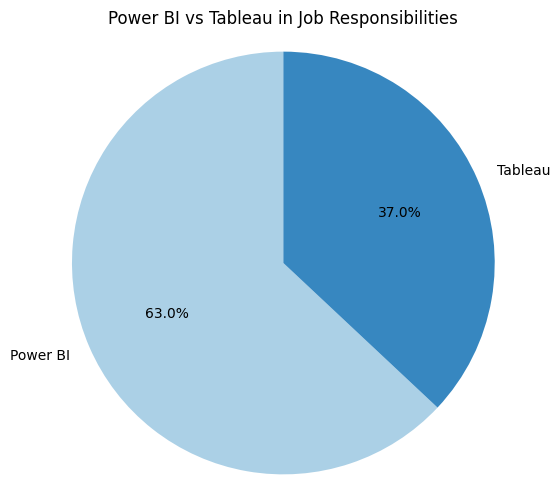

In [52]:
powerbi_count = df['resposibilities'].str.split(',').explode().str.lower().str.contains('power bi').sum() + df['resposibilities'].str.split(',').explode().str.lower().str.contains('powerbi').sum()
tableau_count = df['resposibilities'].str.split(',').explode().str.lower().str.contains('tableau').sum()


labels = ['Power BI', 'Tableau']
sizes = [powerbi_count, tableau_count]

colors = sns.color_palette("Blues", n_colors=2)

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Power BI vs Tableau in Job Responsibilities')
plt.axis('equal')

plt.show()


##3.3) Top 25 Most Popular Job roles on Naukri

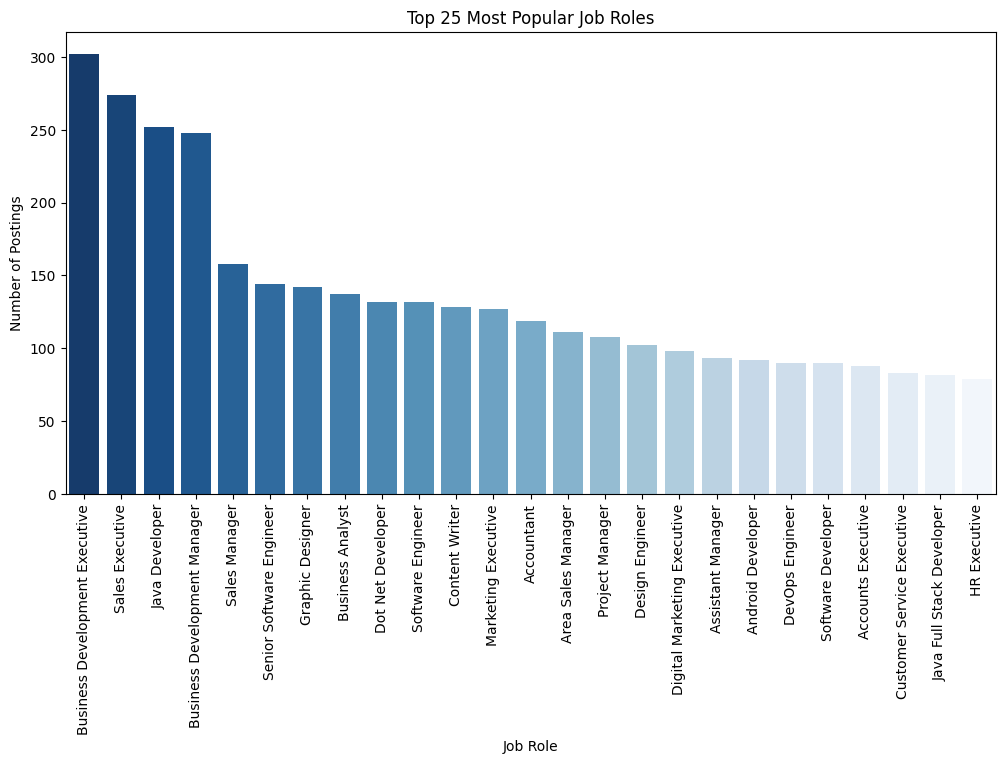

In [53]:
top_25_roles = df['job_role'].value_counts().head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_25_roles.index, y=top_25_roles.values, palette="Blues_r")

plt.title('Top 25 Most Popular Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)

plt.show()


## 3.4) Number of jobs by Experience Level

Text(0.5, 0, 'Experience (Years)')

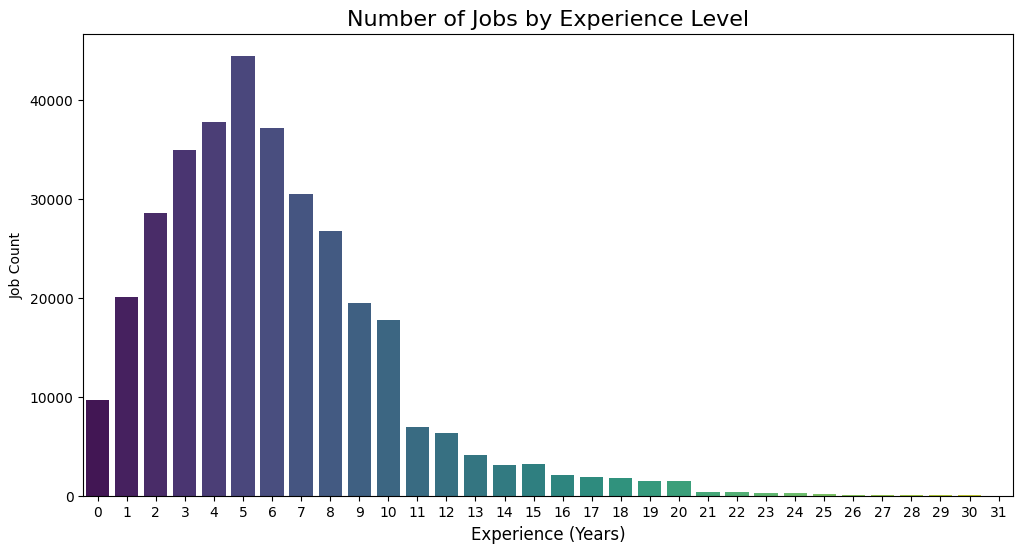

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

experience_counts = []

for exp in range(df['min_experience'].min(), df['max_experience'].max() + 1):
    experience_counts.append([exp, len(df[(df['max_experience'] >= exp) & (df['min_experience'] <= exp)])])

experience_df = pd.DataFrame(experience_counts, columns=['Experience', 'Job Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Experience', y='Job Count', data=experience_df, palette='viridis')

plt.title('Number of Jobs by Experience Level', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)

##3.5)Top 10 Job Roles

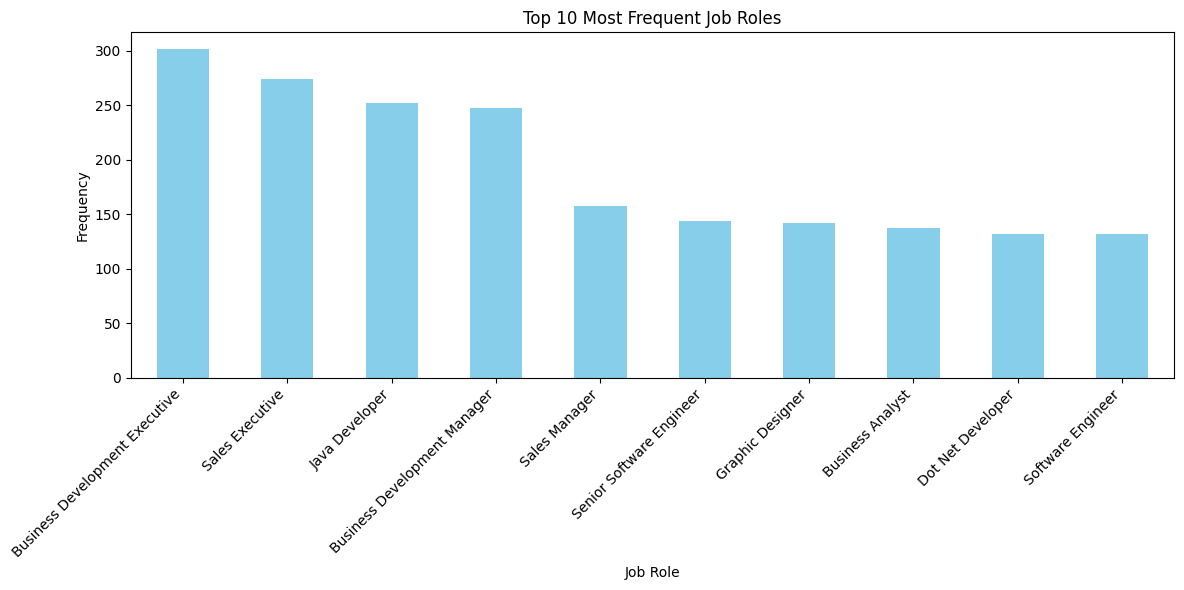

In [58]:
plt.figure(figsize=(12, 6))
df['job_role'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.xlabel("Job Role")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Job Roles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_job_roles.png')
plt.show()

##3.6)Top 10 Job Locations

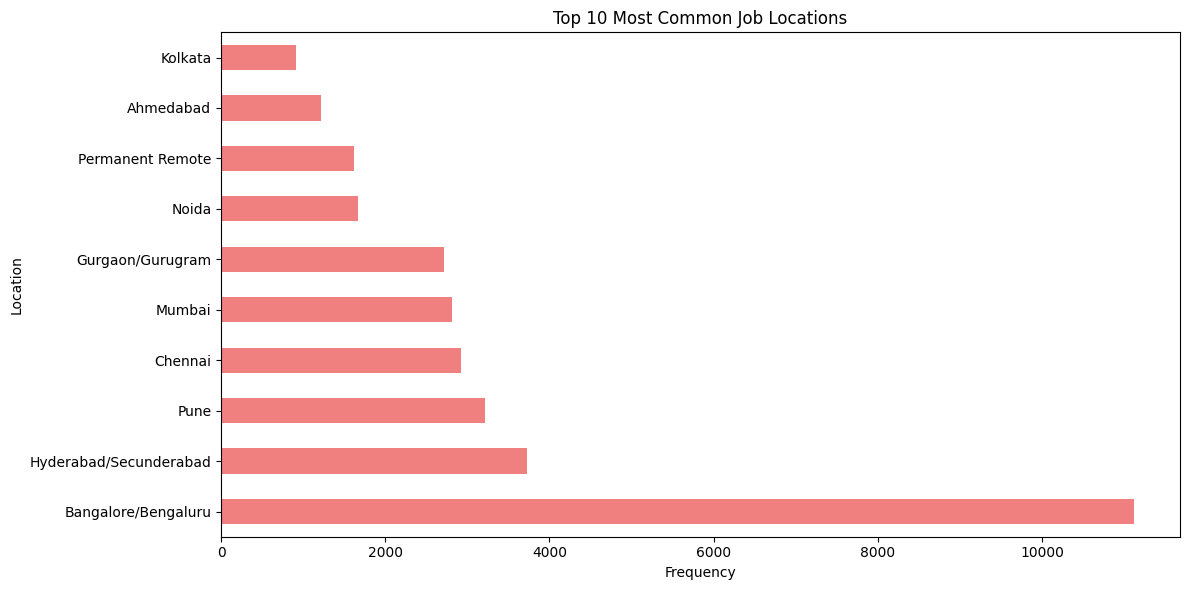

In [59]:
plt.figure(figsize=(12, 6))
df['location'].value_counts().head(10).plot(kind='barh', color='lightcoral')
plt.xlabel("Frequency")
plt.ylabel("Location")
plt.title("Top 10 Most Common Job Locations")
plt.tight_layout()
plt.savefig('top_10_job_locations.png')
plt.show()

## 3.7) Rating vs. Reviews

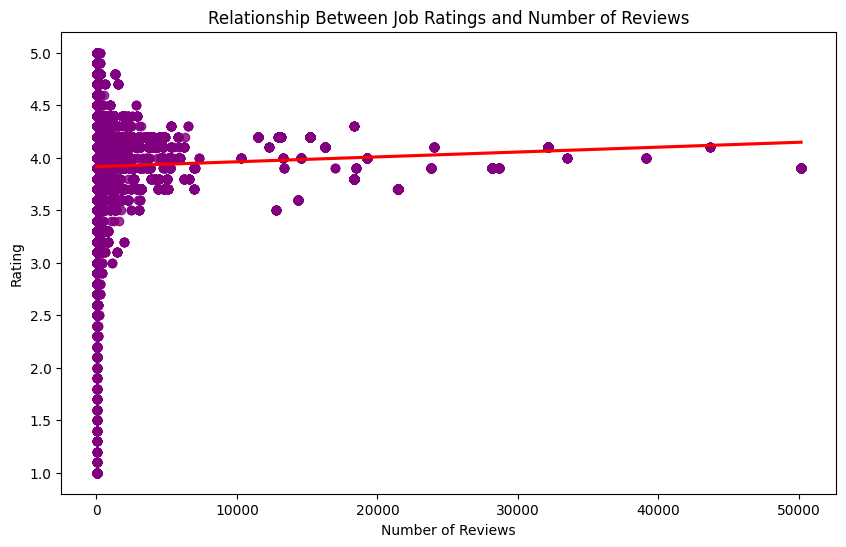

In [60]:
plt.figure(figsize=(10, 6))
sns.regplot(x='reviews', y='rating', data=df, scatter_kws={"color": "purple"}, line_kws={"color": "red"})
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Relationship Between Job Ratings and Number of Reviews")
plt.savefig('rating_vs_reviews.png')
plt.show()
